In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from spwc import sscweb
from spwc.common import variable
from astropy.units import km

In [3]:
import sys
sys.path.append('lpp/broni')  # local kludge to import broni

from broni.shapes.primitives import Cuboid, Sphere
import broni

**Loading the orbit-data of *mms1* from SSCWeb**

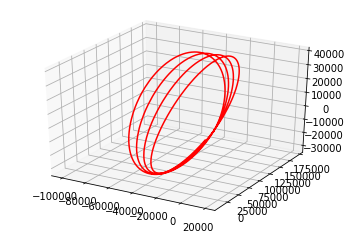

In [4]:
coord_sys = "gse"

ssc = sscweb.SscWeb()
sv = ssc.get_orbit(product="mms1",
                   start_time="2020-10-10",
                   stop_time="2020-10-24",
                   coordinate_system=coord_sys)

fig = plt.figure()
ax = fig.gca(projection='3d')
_ = ax.plot(sv.data[:, 0], sv.data[:, 1], sv.data[:, 2], color='r')    

**Creating a trajectory-instance from the loaded orbit data.**

In [5]:
orbit = broni.Trajectory(sv.data[::2, 0] * km,
                         sv.data[::2, 1] * km,
                         sv.data[::2, 2] * km,
                         sv.time[::2],
                         coordinate_system=coord_sys)

**Now create an instance of a Sphere-primitive.**

In [6]:
sphere = Sphere(30000 * km, 30000 * km, 30000 * km, 25000 * km)

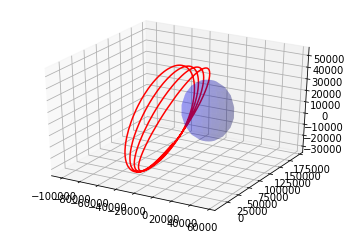

In [7]:
def sphere_mesh(sphere):
    u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    x = sphere.center[0] + sphere.radius * np.cos(u) * np.sin(v)
    y = sphere.center[1] + sphere.radius * np.sin(u) * np.sin(v)
    z = sphere.center[2] + sphere.radius * np.cos(v)

    return np.array((x, y, z), dtype=float)

o = sphere_mesh(sphere)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(sv.data[:, 0], sv.data[:, 1], sv.data[:, 2], color='r')    
_ = ax.plot_surface(o[0], o[1], o[2], color="b", alpha=0.2)

**Getting the intersection intervals of the sphere and the orbit.**

In [8]:
intervals = broni.intervals(orbit, sphere)
print("found", len(intervals), "intervals")
for i in sorted(intervals):
    print('  ',
          datetime.datetime.fromtimestamp(i[0]).strftime('%c'), '-',
          datetime.datetime.fromtimestamp(i[1]).strftime('%c'), ';')

found 4 intervals
   Sat Oct 10 02:42:30 2020 - Sat Oct 10 05:08:30 2020 ;
   Tue Oct 13 14:54:30 2020 - Tue Oct 13 17:34:30 2020 ;
   Sat Oct 17 03:04:30 2020 - Sat Oct 17 06:02:30 2020 ;
   Tue Oct 20 15:04:30 2020 - Tue Oct 20 18:16:30 2020 ;


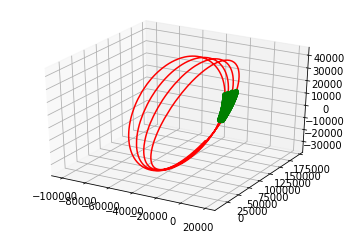

In [9]:
slice1 = variable.merge([sv[interval[0]:interval[1]] for interval in intervals]).data

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(sv.data[:, 0], sv.data[:, 1], sv.data[:, 2], color='r')    
_ = ax.scatter(slice1[:, 0], slice1[:, 1], slice1[:, 2], color='g')